In [1]:
import os

os.environ["SDL_AUDIODRIVER"] = "dummy"

/workspaces/acoustic-event-prediction/.venv/lib/python3.12/site-packages/pygame/pkgdata.py:25: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_stream, resource_exists


########################################
Load pretrained CPC
########################################
Froze EncoderCPC!
########################################
Load pretrained CPC
########################################
Froze EncoderCPC!
freeze encoder
Froze EncoderCPC!
Froze EncoderCPC!
[Warning] Audio queue (channel 1) overflow detected. Clearing audio queues.
[Warning] Audio queue (channel 1) overflow detected. Clearing audio queues.
[Warning] Audio queue (channel 1) overflow detected. Clearing audio queues.
[Warning] Audio queue (channel 1) overflow detected. Clearing audio queues.
[Warning] Audio queue (channel 1) overflow detected. Clearing audio queues.
[Warning] Audio queue (channel 1) overflow detected. Clearing audio queues.
[Warning] Audio queue (channel 1) overflow detected. Clearing audio queues.
[Warning] Audio queue (channel 1) overflow detected. Clearing audio queues.
[Warning] Audio queue (channel 1) overflow detected. Clearing audio queues.
[Warning] Audio queue (ch

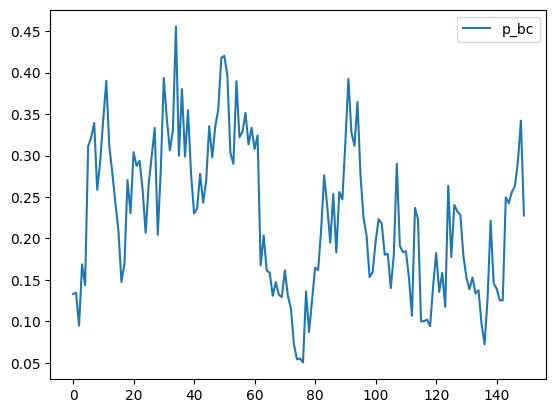

In [2]:
from maai import Maai, MaaiInput, MaaiOutput
import matplotlib.pyplot as plt

wav = MaaiInput.Wav(wav_file_path='../data/Linear Digressions_What makes a machine learning algorithm "superhuman"_30sec.wav')
zero = MaaiInput.Zero()

output = MaaiOutput.GuiPlot(frame_rate=20)

maai = Maai(
    mode="bc",
    lang="jp",
    frame_rate=20,
    audio_ch1=wav,
    audio_ch2=zero,
    device="cpu"
)

maai.start()
results = []
count = 0
while count < 150:
    result = maai.get_result()
    count += 1
    results.append(result)
maai.stop()
plt.plot([r['p_bc'] for r in results], label='p_bc')
plt.legend()
plt.show()

In [5]:
start = results[0]['t']
for r in results:
    print(r['t']-start)

0.0
0.20396041870117188
0.43561840057373047
0.6513640880584717
0.8832032680511475
1.1133720874786377
1.3652617931365967
1.5417957305908203
1.709277629852295
1.879319190979004
2.0543572902679443
2.226999521255493
2.3879475593566895
2.566145896911621
2.789191722869873
2.968280792236328
3.1365509033203125
3.3086395263671875
3.4752197265625
3.6463921070098877
3.813396692276001
3.9789955615997314
4.220465898513794
4.3973541259765625
4.567578077316284
4.734950065612793
4.9012839794158936
5.070708513259888
5.247687816619873
5.428279638290405
5.651278018951416
5.81861138343811
5.9950971603393555
6.188091516494751
6.3756489753723145
6.5709145069122314
6.7508955001831055
6.924617767333984
7.148428678512573
7.326617479324341
7.503607273101807
7.69327712059021
7.881704092025757
8.044280529022217
8.202462196350098
8.359266757965088
8.601276636123657
8.781036615371704
8.940032720565796
9.110971212387085
9.268074035644531
9.42586088180542
9.597894191741943
9.823205947875977
10.052329301834106
10.2362

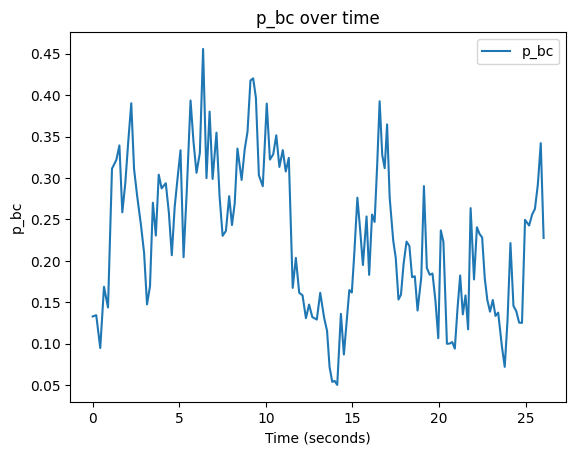

In [6]:
plt.plot([r['t']-start for r in results], [r['p_bc'] for r in results], label='p_bc')
plt.xlabel('Time (seconds)')
plt.ylabel('p_bc')
plt.title('p_bc over time')
plt.legend()
plt.show()